In [6]:
from scipy import sparse
import csv
import sys
import os
import pandas
import numpy as np
import multiprocessing
import random
from sklearn.externals import joblib

In [ ]:
X = []
Y = []
f1=open(unicode('./datasetPersonTab'))
f2=open(unicode('./datasetNNPTab'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[4:])
    Y.append('Person')
size = len(X)
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[4:])
    Y.append('No')

In [ ]:
X_test = []
Y_test = []
f1=open(unicode('./datasetPersonTabTest'))
f2=open(unicode('./datasetNNPTabTest'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('Person')
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('No')

In [ ]:
set_futures =[]
for i in range(27):
    set_futures.append(set())
for x in X+X_test:
    for i, x_i in enumerate(x):
        set_futures[i].add(x_i)

In [ ]:
feature_dict = []
for i in range(27):
    feature_dict.append(dict())
    
for i in range(27):
    count = 0
    for x in set_futures[i]:
        feature_dict[i][x] = count
        count+=1

In [ ]:
filename = './DiplomaDataPerson_feature_dict.joblib.pkl'
joblib.dump(feature_dict, filename, compress=3)

In [ ]:
filename = './DiplomaDataPerson_set_futures.joblib.pkl'
joblib.dump(set_futures, filename, compress=3)

In [ ]:
X_int=[]
for x in X:
    X_int.append([0]*len(x)) 
for i, x in enumerate(X):
    for j, x_j in enumerate(x):
        X_int[i][j]=feature_dict[j][x_j]

In [ ]:
filename = './DiplomaDataPerson_X_int.joblib.pkl'
joblib.dump(X_int, filename, compress=3)

In [ ]:
X_int_test=[]
for x in X_test:
    X_int_test.append([0]*len(x)) 
for i, x in enumerate(X_test):
    for j, x_j in enumerate(x):
        X_int_test[i][j]=feature_dict[j][x_j]

In [ ]:
filename = './DiplomaDataPerson_X_int_test.joblib.pkl'
joblib.dump(X_int_test, filename, compress=3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
enc.fit_transform(X_int+X_int_test)
filename = './DiplomaDataPerson_enc.joblib.pkl'
joblib.dump(enc, filename, compress=3)

In [ ]:
random.shuffle(X_int[size:])
X_sparse_matrix = enc.transform(X_int[:size]+X_int[size:200000])

In [ ]:
import sklearn.ensemble  
RF = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=3)

In [ ]:
X_new = RF.fit_transform(X_sparse_matrix, Y[:size]+Y[size:200000])

In [ ]:
filename = './DiplomaDataPerson_RF50_200000.joblib.pkl'
joblib.dump(RF, filename, compress=3)

In [ ]:
recall_set = dict()
presision_set = dict()
F_measure_set = dict()

In [33]:
Y_test_result =RF.predict_proba(enc.transform(X_int_test[:46850]))

NameError: name 'RF' is not defined

DONE!!!

In [ ]:
f_n = 0
f_p = 0
t_n=0
t_p=0
f = open('f_p', 'w')
for i, y in enumerate(Y_test_result):
    y_str = 'No'
    if y[1]>0.5:
        y_str = 'Person'
    if y_str != Y_test[i]:
        if y_str=='No':
            f_n+=1
            #print X[10000+i]
        else:
            f_p+=1
            f.write(X_test[i][1])
            f.write(',')
            f.write(str(y[1]))
            f.write('\n')
            
    elif y_str =='No':
        t_n+=1
    else:
        t_p+=1
recall = t_p*1./(t_p+f_n+1)
presision = t_p*1./(t_p+f_p+1)
print recall
print presision
print f_p, f_n, t_p, t_n
F_measure = 2*presision*recall/(presision+recall)
print F_measure   
recall_set[len(Y_test_result)] = recall
presision_set[len(Y_test_result)] = presision
F_measure_set[len(Y_test_result)] = F_measure

In [ ]:
len(X_int_test)

In [17]:
#!/usr/bin/env python
#coding=utf-8
import matplotlib as mpl
import matplotlib.pyplot as plt

# устанавливаем стиль fantasy по умолчанию
mpl.rcParams['font.family'] = 'fantasy'

# устанавливаем в стиль fantasy шрифт, который отображает кириллицу, например, Arial
mpl.rcParams['font.fantasy'] = 'Arial'

In [19]:
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)

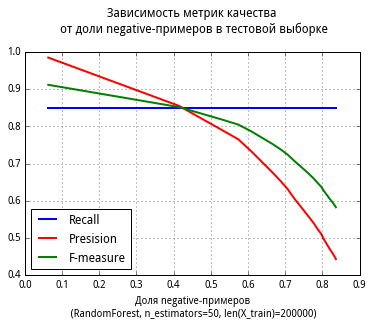

In [32]:
# -*- coding: utf-8 -*-
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt

def save(name=''):
    plt.savefig('./pictures/'+ name, fmt='png')
    #plt.close()

import numpy as np
l=['Recall' , 'Presision' , 'F-measure']

# Пример функции с объединением в кортеж *args
def f_sums(*args):

    list1 = []
    for arg in args:
        a = 0
        for i in arg:
            a += i
        list1.append(a)

    return list1


# Пример функции с объединением и в кортеж args и в словарь **kwargs
def f_plot(*args, **kwargs):

    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if(i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg) 
    
    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=l[i-1])
    
    ax.grid(True)
    #ax.legend()
    plt.legend(loc=3,prop={'size':12})
    plt.title(u'Зависимость метрик качества\n от доли negative-примеров в тестовой выборке\n')
    plt.xlabel(u'Доля negative-примеров\n (RandomForest, n_estimators=50, len(X_train)=200000)')
    save(u'Зависимость метрик качества от доли negative-примеров в тестовой выборке')
    

x = []
y1 =[]
y2 =[]
y3 =[]

# keys = F_measure_set.keys()
# keys.sort()
# for x_ in keys:
#     if x_>46850:
#         x.append((x_ - 46850)*1./x_)
#         y1.append(recall_set[x_])
#         y2.append(presision_set[x_])
#         y3.append(F_measure_set[x_])
filename = './DiplomaDataPerson_GrX.pkl'
x = joblib.load(filename)
filename = './DiplomaDataPerson_GrRec.pkl'
y1 = joblib.load(filename)
filename = './DiplomaDataPerson_GrPre.pkl'
y2 = joblib.load(filename)
filename = './DiplomaDataPerson_GrF.pkl'
y3 = joblib.load(filename)
    
f_plot(x , y1, x, y2, x , y3, colors=['blue', 'red', 'green'], linewidth=2.)

In [ ]:
scores = cross_validation.cross_val_score(RF, X_sparse_matrix, Y[:300000], cv = 9,n_jobs=-1)

TO DO